# <span style="color:green"> Numerical Simulation Laboratory: Numerical Exercises 12 </span>


#  <span style="color:darkorange"> Exercise 12.1 </span>

We start by importing the data from MNIST:

In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

ImgRows, ImgCols = 28, 28   # Pixels
Nclasses = 10               # 10 digits
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

########## Resize Data ##########
# X_train = X_train[0:6000]
# Y_train = Y_train[0:6000]
# X_test = X_test[0:1000] 
# Y_test = Y_test[0:1000] 
#################################

X_train = X_train.reshape(X_train.shape[0], ImgRows*ImgCols)
X_test = X_test.reshape(X_test.shape[0], ImgRows*ImgCols)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_train = keras.utils.to_categorical(Y_train, Nclasses)
Y_test = keras.utils.to_categorical(Y_test, Nclasses)

We then create the functions which generate, compile the DNN and plot the values of Accuracy and Loss for three optimizers: Adam(), Adadelta(), Adamax().

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Softmax, MaxPooling2D, Flatten, Conv2D
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def CreateDNN():
    model = Sequential()
    model.add(Dense(400,input_shape=(ImgRows*ImgCols,), activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(Nclasses, activation='softmax'))
    return model

def CompileModel(OPT):
    model = CreateDNN()
    LossFunction = keras.losses.categorical_crossentropy
    model.compile(loss = LossFunction, optimizer = OPT, metrics=['accuracy'])
    return model

def CreateComparison(OPT, Title, X_train, Y_train, X_test, Y_test, Nbatch, Nepochs, Verbose):
    fig, ax = plt.subplots(nrows=len(OPT), ncols=2, figsize=(14, 5*len(OPT)))
    ax = ax.flatten()
    fig.suptitle(f"Comparison between optimizers", size=15)
    fig.subplots_adjust(hspace=0.25)
    for Index in range(len(OPT)):
        Model_DNN = CompileModel(OPT[Index])
        History = Model_DNN.fit(X_train, Y_train, batch_size = Nbatch, epochs = Nepochs, verbose=Verbose, 
                                validation_data=(X_test, Y_test))
        Score = Model_DNN.evaluate(X_test, Y_test, verbose=Verbose)
        # Accuracy
        ax[2*Index].plot(History.history['accuracy'], linewidth=3, color="tab:green")
        ax[2*Index].plot(History.history['val_accuracy'], linewidth=3, color="tab:blue")
        ax[2*Index].set_ylabel('Accuracy', fontsize=13)
        ax[2*Index].set_xlabel('Epoch', fontsize=13)
        ax[2*Index].set_title(Title[Index]+" - Accuracy", fontsize=13)
        ax[2*Index].legend(['Train', 'Test'], loc='best', prop={"size":12})
        # Loss
        ax[2*Index+1].plot(History.history['loss'], linewidth=3, color="tab:red")
        ax[2*Index+1].plot(History.history['val_loss'], linewidth=3, color="tab:orange")
        ax[2*Index+1].set_ylabel('Loss', fontsize=13)
        ax[2*Index+1].set_xlabel('Epoch', fontsize=13)
        ax[2*Index+1].set_title(Title[Index]+" - Loss", fontsize=13)
        ax[2*Index+1].legend(['Train', 'Test'], loc='best', prop={"size":12})
    plt.show()

###  <span style="color:green"> Accuracy and Loss - Plots </span>

It seems that Adadelta is the least effective among the three optimizers we chose, while Adam and Adamax are very similar, having both an accuracy close to $98\%$.

Epoch 1/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2821 - accuracy: 0.9171 - val_loss: 0.1187 - val_accuracy: 0.9625
Epoch 2/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1240 - accuracy: 0.9644 - val_loss: 0.1017 - val_accuracy: 0.9693
Epoch 3/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0905 - accuracy: 0.9741 - val_loss: 0.0795 - val_accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0687 - accuracy: 0.9798 - val_loss: 0.0729 - val_accuracy: 0.9785
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 0.0711 - accuracy: 0.9788
Epoch 1/5
1875/1875 [==============================] - 27s 15ms/step - loss: 2.3036 - accuracy: 0.1400 - val_loss: 2.1600 - val_accuracy: 0.3076
Epoch 2/5
1875/1875 [==============================] - 27s 14ms/step - loss: 2.1229 - accuracy: 0.2682 - val_loss: 1.9859 - val_accuracy: 0.5035
Epoch 3/5
1875/1875 [==========

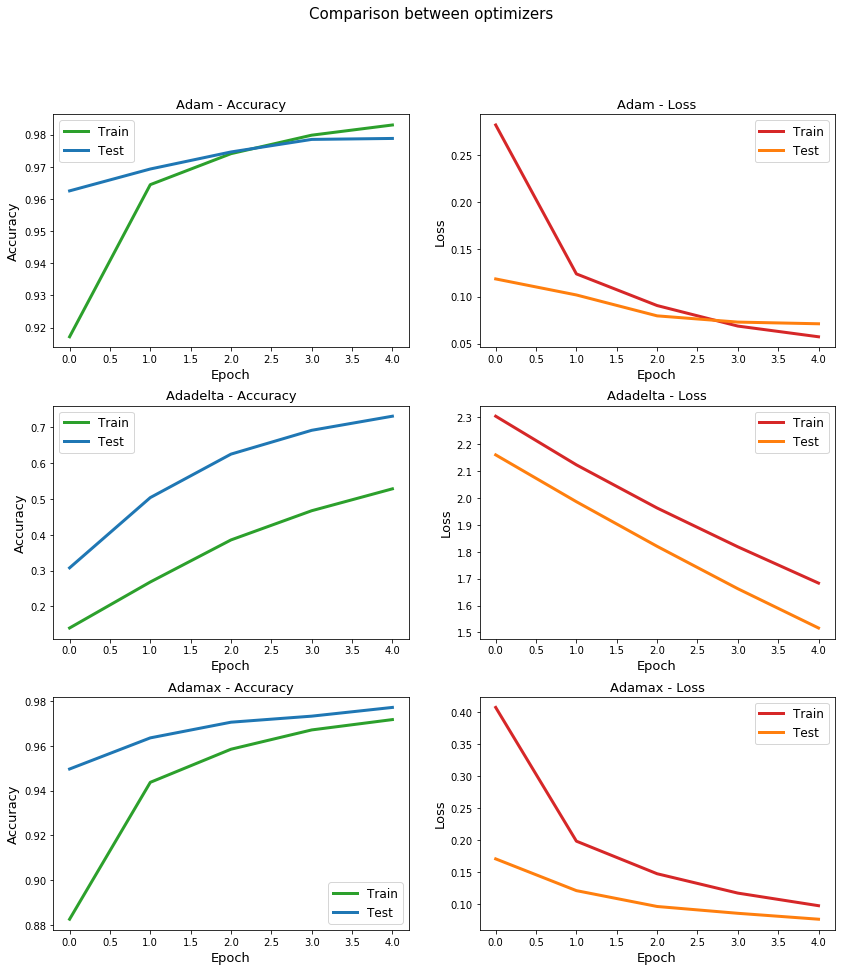

In [3]:
Nbatch = 32
Nepochs = 5
Verbose = True
OPT = [Adam(), Adadelta(), Adamax()]
Title = ["Adam", "Adadelta", "Adamax"]

CreateComparison(OPT, Title, X_train, Y_train, X_test, Y_test, Nbatch, Nepochs, Verbose) # Plot the three models

#  <span style="color:darkorange"> Exercise 12.2 </span>

###  <span style="color:green"> Image reshaping - 28x28x1 </span>

In [4]:
# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, ImgRows, ImgCols)
    X_test = X_test.reshape(X_test.shape[0], 1, ImgRows, ImgCols)
    input_shape = (1, ImgRows, ImgCols)
else:
    X_train = X_train.reshape(X_train.shape[0], ImgRows, ImgCols, 1)
    X_test = X_test.reshape(X_test.shape[0], ImgRows, ImgCols, 1)
    input_shape = (ImgRows, ImgCols, 1)

###  <span style="color:green"> CNN </span>
We decided to adopt the following CNN structure (with SGD as the optimizer):
1. **Conv2D**, $Kernel = 5\times 5$, $Filters = 16$, $ReLu$;
2. **MaxPooling2D**, $Pool = 2\times 2$;
3. **Conv2D**, $Kernel = 3\times 3$, $Filters = 8$, $ReLu$;
4. **MaxPooling2D**, $Pool = 2\times 2$;
5. **Flatten**, which generates 200 1D elements
6. **Dense**, 200 neurons, $ReLu$;
7. **Dense**, 10 neurons, $ReLu$;
8. **Softmax**

In [5]:
def Plot(Model, X_train, Y_train, X_test, Y_test, Nbatch, Nepochs, Verbose):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
    ax = ax.flatten()
    fig.suptitle(f"Comparison between optimizers", size=15)
    History = Model.fit(X_train, Y_train, batch_size = Nbatch, epochs = Nepochs, verbose=Verbose, 
                            validation_data=(X_test, Y_test))
    Score = Model.evaluate(X_test, Y_test, verbose=Verbose)
    # Accuracy
    ax[0].plot(np.arange(1, Nepochs+1), History.history['accuracy'], linewidth=3, color="tab:green")
    ax[0].plot(np.arange(1, Nepochs+1), History.history['val_accuracy'], linewidth=3, color="tab:blue")
    ax[0].set_ylabel('Accuracy', fontsize=13)
    ax[0].set_xlabel('Epoch', fontsize=13)
    ax[0].set_title("Accuracy", fontsize=13)
    ax[0].legend(['Train', 'Test'], loc='best', prop={"size":12})
    # Loss
    ax[1].plot(np.arange(1, Nepochs+1), History.history['loss'], linewidth=3, color="tab:red")
    ax[1].plot(np.arange(1, Nepochs+1), History.history['val_loss'], linewidth=3, color="tab:orange")
    ax[1].set_ylabel('Loss', fontsize=13)
    ax[1].set_xlabel('Epoch', fontsize=13)
    ax[1].set_title("Loss", fontsize=13)
    ax[1].legend(['Train', 'Test'], loc='best', prop={"size":12})
    plt.show()

def CreateCNN(): # SGD, relu (each layer); Conv(5x5x16), Pooling(2x2), Conv(3x3x8), Pooling(2x2), Flatten(->200)
    model = Sequential()
    model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=input_shape)) # 24x24
    model.add(MaxPooling2D(pool_size=(2, 2))) #12x12
    model.add(Conv2D(8, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=input_shape)) # 10x10
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1))) # 5x5
    model.add(Flatten()) # 5x5x8
    model.add(Dense(200, input_shape=[1], activation="relu"))
    model.add(Dense(10, input_shape=[1], activation="relu"))
    model.add(Softmax(axis=-1))
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=['accuracy'])
    model.summary()
    return model

###  <span style="color:green"> Training </span>

We use the function **Plot** which performs the fit and plots accuracy and loss of the model.

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 648)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 200)               129800    
_________________________________________________________________
dense_10 (Dense)             (None, 10)               

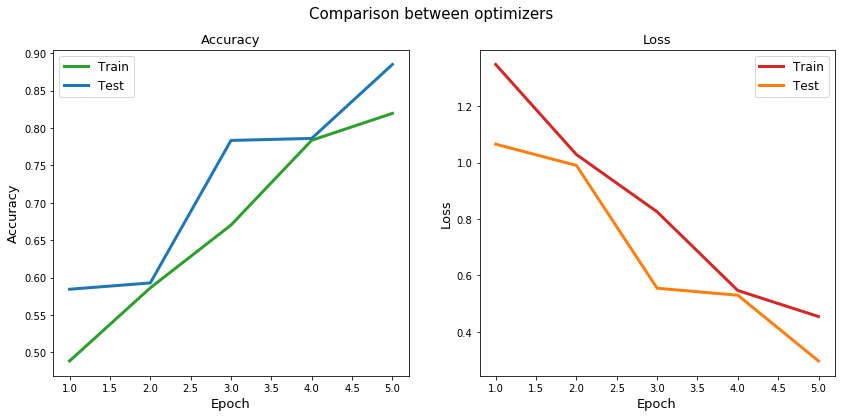

In [6]:
Nbatch = 32
Nepochs = 5
Verbose = True

Model = CreateCNN()
Plot(Model, X_train, Y_train, X_test, Y_test, Nbatch, Nepochs, Verbose)

###  <span style="color:green"> Predictions </span>

On this set of images, the algorithm proves to be very effective, since $\thinspace\thinspace\mathrm{accuracy \sim 98\%}$.<br>
Therefore we represent $\mathrm{N_{plot}}$ images of the digits and the corresponding predictions made by the CNN.

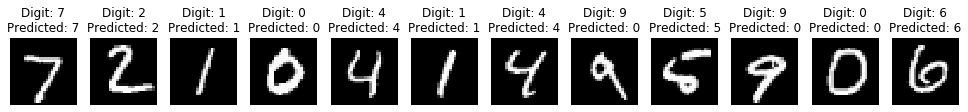

In [7]:
predictions = Model.predict(X_test)
X_test_reshaped = X_test.reshape(X_test.shape[0], ImgRows, ImgCols, 1)

Nplot = 12
plt.figure(figsize=(17, 15)) 
for i in range(Nplot):    
    ax = plt.subplot(2, Nplot, i + 1)
    plt.imshow(X_test_reshaped[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

#  <span style="color:darkorange"> Exercise 12.3 </span>

We can now predict the ten digits contained in the folder **Numbers**, created with GIMP. We see that the only <span style="color:orangered"> wrong predictions </span> are associated with *9* and *4*, since the representation of the digits seems to be different from the one which characterizes the training set.

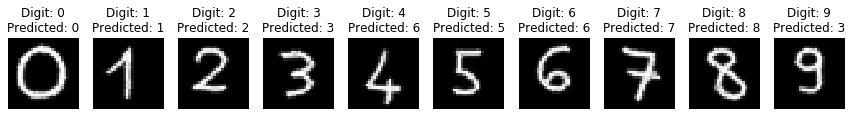

In [8]:
from PIL import Image
import os

Dim = 28
Digit = np.arange(0, 10)
DigitImage, Data, Pix = [], [], []
Pred = []
Nplot = 12
plt.figure(figsize=(15, 15))    
     
for n in range(0, 10):
    DigitImage.append(Image.open("Numbers/"+str(Digit[n])+".png").convert('L'))
    Pix.append(DigitImage[n].load());
    Data.append(np.zeros((Dim, Dim)))
    for j in range(Dim):
        for i in range(Dim):
            Data[n][i][j]=Pix[n][j, i]
    Data[n] /= 255
    ax = plt.subplot(2, 10, n + 1)
    plt.imshow(Data[n][:][:], cmap='gray')
    Data[n] = Data[n].reshape(1, Dim, Dim, 1)
    Pred.append(Model.predict(Data[n]))
    ax.set_title("Digit: {}\nPredicted: {}".format(n, np.argmax(Pred[n])))
    plt.axis('off') 
    
plt.show()